In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch

In [2]:
from models.networks.Attention_unet import AttentionUnet

In [3]:
data_gauss=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size5mm_depth10pct_thickness3mm/param_fbh_gaussian_size5mm_depth10pct_thickness3mm.npz')
data_uniform=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.07.06 -param_study_fbh_size_depth_thickness/param_fbh_size20mm_depth90pct_thickness3mm/param_fbh_size20mm_depth90pct_thickness3mm.npz')

<h1>Characteristic of synthetic data</h1>

In [4]:
data_gauss['data'].shape

(304, 512, 512)

In [5]:
data_gauss['mask'].shape

(512, 512)

In [6]:
data_uniform['data'].shape

(124, 512, 512)

Text(0.5, 1.0, 'Uniform Heating example')

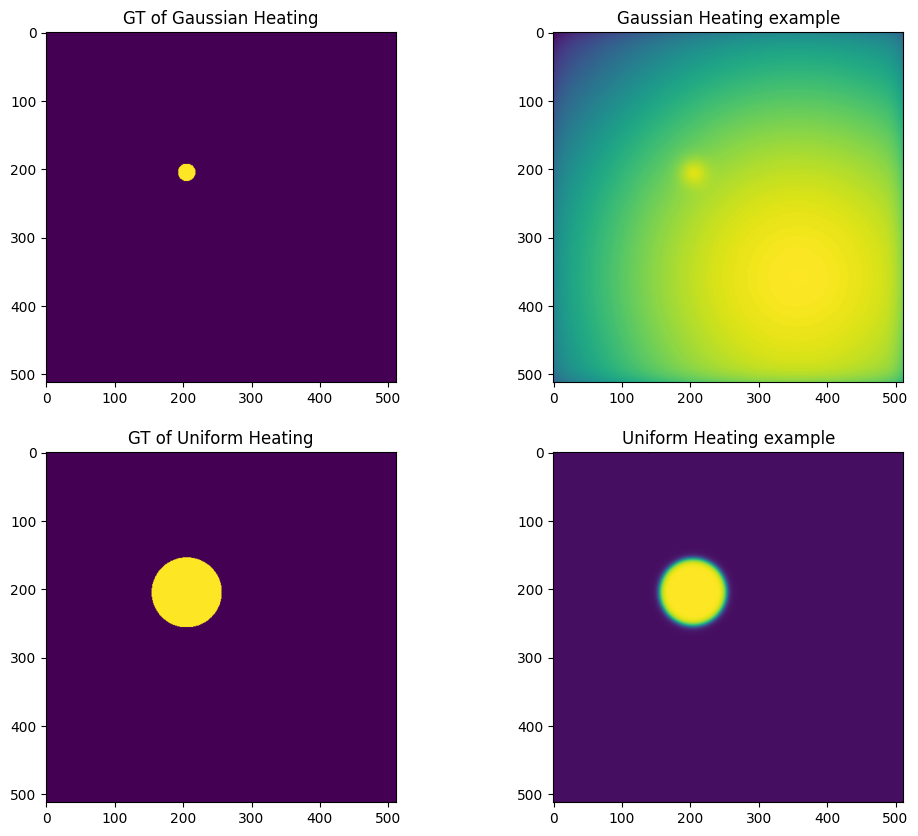

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(data_gauss['mask'])
plt.title('GT of Gaussian Heating')
plt.subplot(2,2,2)
plt.imshow(data_gauss['data'][100,:,:])
plt.title('Gaussian Heating example')
plt.subplot(2,2,3)
plt.imshow(data_uniform['mask'])
plt.title('GT of Uniform Heating')
plt.subplot(2,2,4)
plt.imshow(data_uniform['data'][20,:,:])
plt.title('Uniform Heating example')


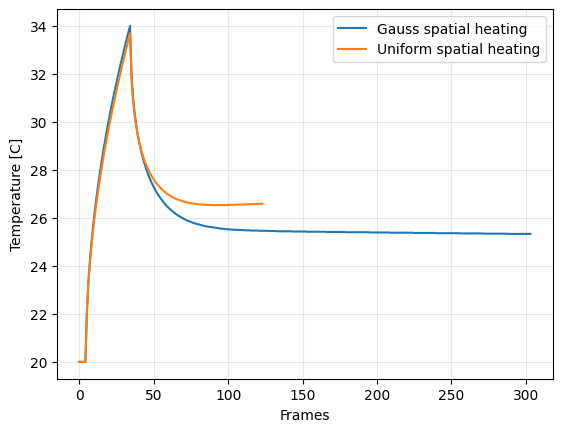

In [8]:
plt.plot(data_gauss['data'][:,250,250],label='Gauss spatial heating')
plt.plot(data_uniform['data'][:,250,250],label='Uniform spatial heating')
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Characteristic of Gaussian heating</h1>

In [9]:
data_gauss_set=[
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size5mm_depth10pct_thickness3mm/param_fbh_gaussian_size5mm_depth10pct_thickness3mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size10mm_depth50pct_thickness6mm/param_fbh_gaussian_size10mm_depth50pct_thickness6mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Gaussian_heating_data/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size25mm_depth80pct_thickness5mm/param_fbh_gaussian_size25mm_depth80pct_thickness5mm.npz')
]

Text(0.5, 1.0, 'Batch 3')

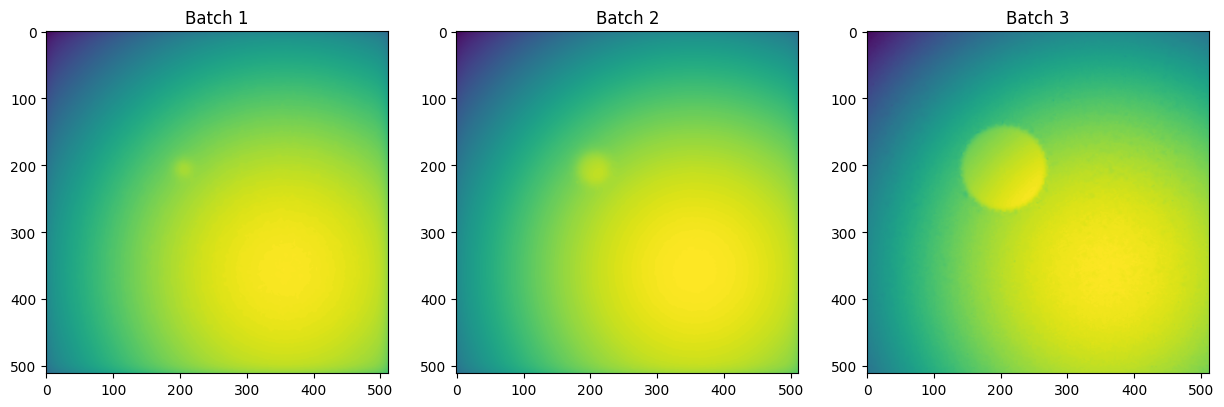

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(data_gauss_set[0]['data'][50,:,:])
plt.title('Batch 1')
plt.subplot(1,3,2)
plt.imshow(data_gauss_set[1]['data'][50,:,:])
plt.title('Batch 2')
plt.subplot(1,3,3)
plt.imshow(data_gauss_set[2]['data'][10,:,:])
plt.title('Batch 3')

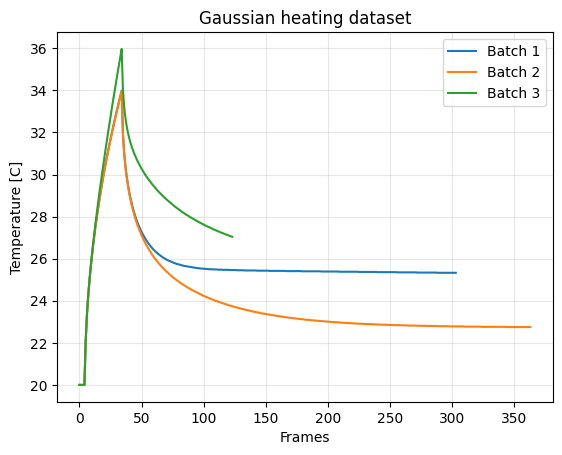

In [11]:
plt.plot(data_gauss_set[0]['data'][:,250,250],label='Batch 1')
plt.plot(data_gauss_set[1]['data'][:,250,250],label='Batch 2')
plt.plot(data_gauss_set[2]['data'][:,250,250],label='Batch 3')
plt.title('Gaussian heating dataset')
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Characteristic of uniform heating</h1>

In [12]:
data_uniform_set=[
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.06.27 - param_study_fbh_size_depth_thickness/param_fbh_size5mm_depth20pct_thickness3mm/param_fbh_size5mm_depth20pct_thickness3mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.07.03 - param_study_fbh_size_depth_thickness/param_fbh_size15mm_depth60pct_thickness5mm/param_fbh_size15mm_depth60pct_thickness5mm.npz'),
    np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Uniform_heating_data/2025.07.06 -param_study_fbh_size_depth_thickness/param_fbh_size25mm_depth90pct_thickness3mm/param_fbh_size25mm_depth90pct_thickness3mm.npz')
]

Text(0.5, 1.0, 'Batch 3')

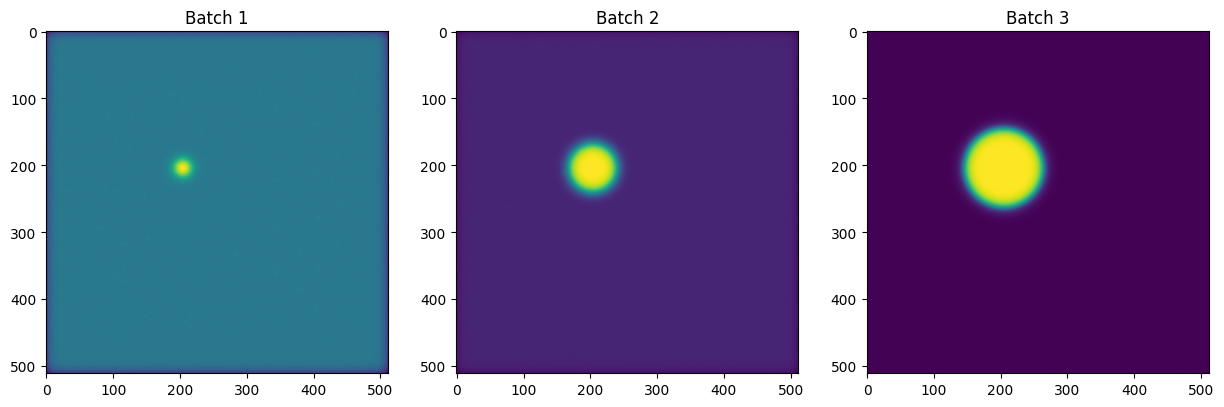

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(data_uniform_set[0]['data'][50,:,:])
plt.title('Batch 1')
plt.subplot(1,3,2)
plt.imshow(data_uniform_set[1]['data'][50,:,:])
plt.title('Batch 2')
plt.subplot(1,3,3)
plt.imshow(data_uniform_set[2]['data'][50,:,:])
plt.title('Batch 3')

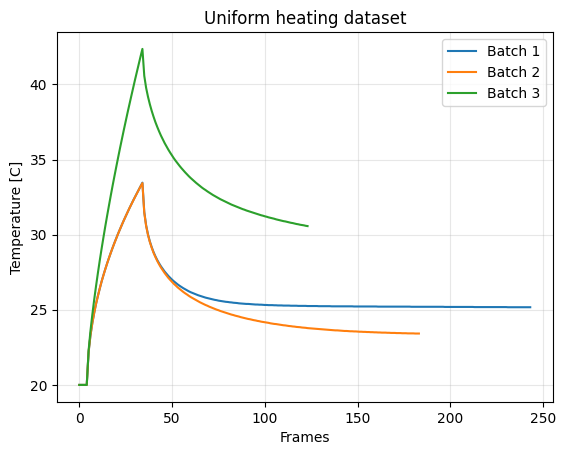

In [14]:
plt.plot(data_uniform_set[0]['data'][:,250,250],label='Batch 1')
plt.plot(data_uniform_set[1]['data'][:,250,250],label='Batch 2')
plt.plot(data_uniform_set[2]['data'][:,250,250],label='Batch 3')
plt.title('Uniform heating dataset')
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.grid(alpha=0.3)
plt.legend()

<h1>Augmentation techniques</h1>

In [15]:
from transforms.augmentations import *

In [16]:
sample=data_gauss['data']
sample.shape

(304, 512, 512)

In [17]:
mask=data_gauss['mask']

In [18]:
sample.dtype

dtype('float64')

In [19]:
sample=torch.from_numpy(sample).to(torch.float64)

In [20]:
sample=sample.unsqueeze(0)

In [21]:
sample.size()

torch.Size([1, 304, 512, 512])

In [22]:
flip=RandomFlip3D(axes=(1,2))

In [23]:
sample_mod,_=flip(sample)

In [24]:
sample_mod.size()

torch.Size([1, 304, 512, 512])

<h2>Random flip of all frames</h2>

Text(0.5, 1.0, 'Frame from modified sample')

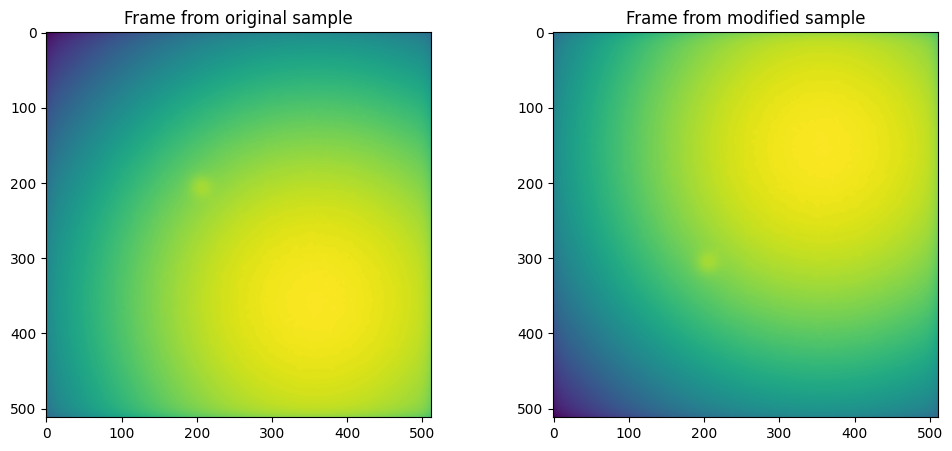

In [25]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_mod[0,50,:,:])
plt.title('Frame from modified sample')

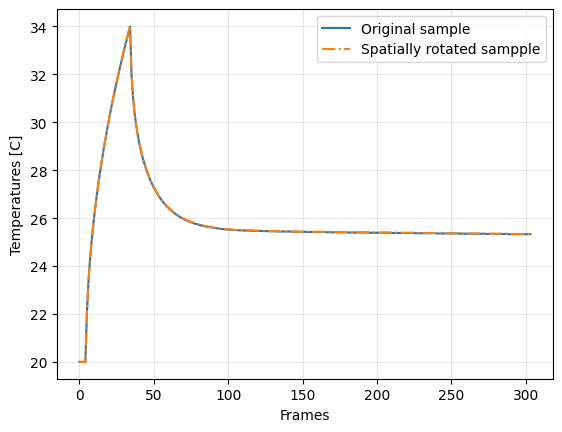

In [26]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_mod[0,:,250,250],label='Spatially rotated sampple',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()


<h2>Add Gaussian Noise to the sequence</h2>

In [27]:
noise=AddGaussianNoise3D(mean=0.5,std=0.065)

In [28]:
sample_noise,_=noise(sample)

Text(0.5, 1.0, 'Frame from modified sample')

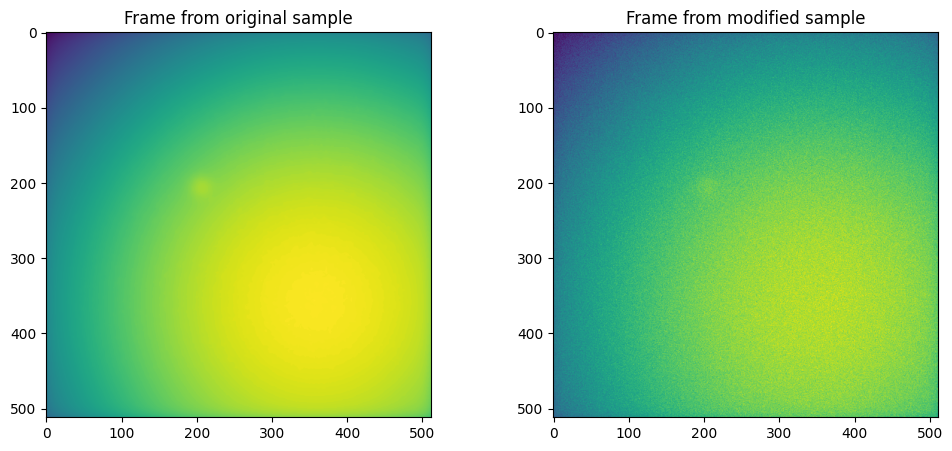

In [29]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_noise[0,50,:,:])
plt.title('Frame from modified sample')

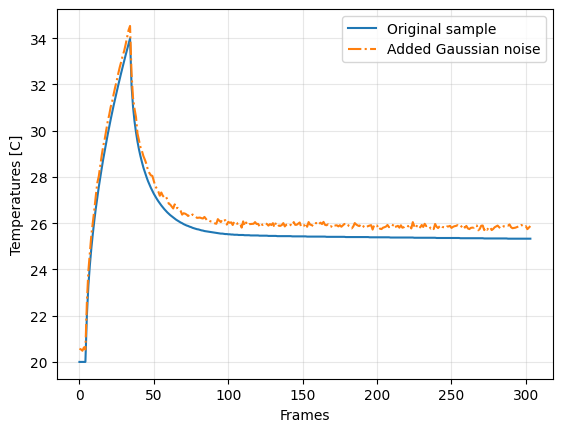

In [30]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_noise[0,:,250,250],label='Added Gaussian noise',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()

(25.0, 27.0)

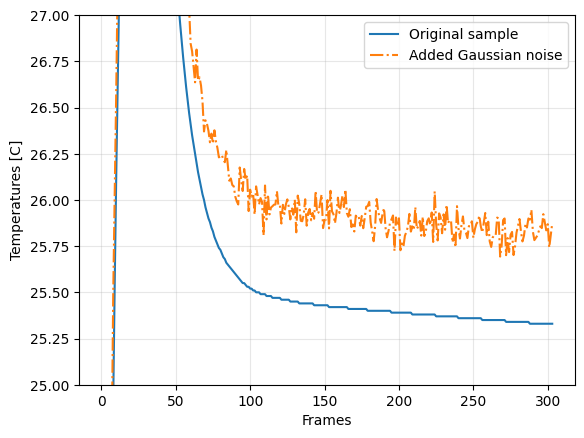

In [31]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_noise[0,:,250,250],label='Added Gaussian noise',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()
plt.ylim([25,27])

<h2>Random rotation</h2>

In [32]:
rotation=RandomSequenceRotation(degrees=180.0,max_shift=(25,25),padding_mode='border')

In [33]:
sample.size()

torch.Size([1, 304, 512, 512])

In [34]:
sample_rot,_=rotation(sample)

Text(0.5, 1.0, 'Frame from modified sample')

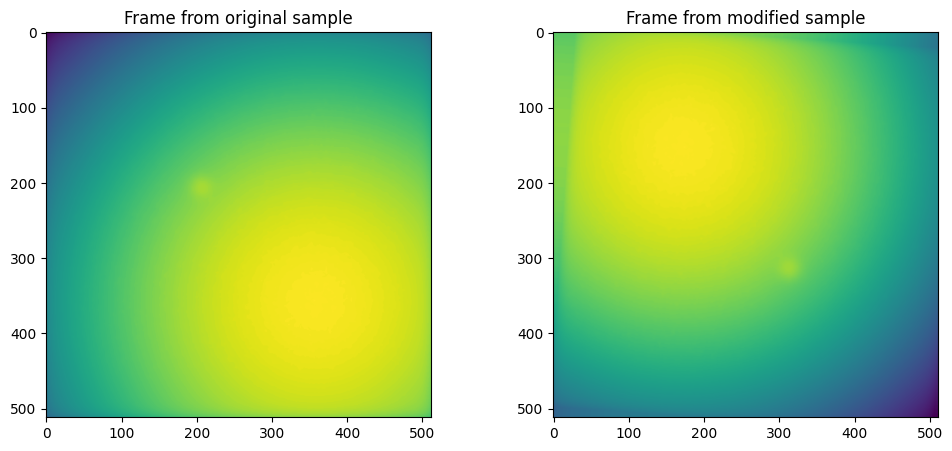

In [35]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_rot[0,50,:,:])
plt.title('Frame from modified sample')

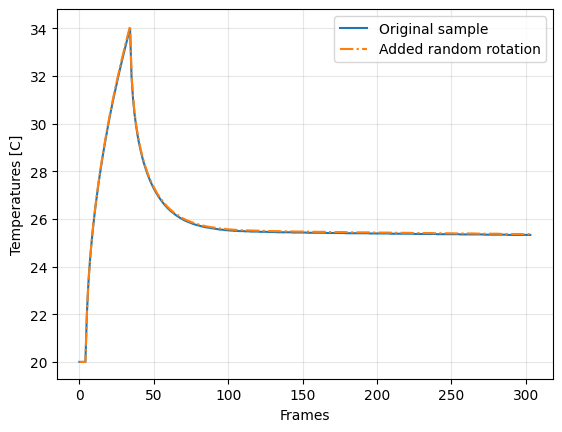

In [36]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_rot[0,:,250,250],label='Added random rotation',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()


<h2>Elastic transformation</h2>

In [52]:
elastic=RandomElasticTransform(alpha=30,sigma=1)

In [53]:
sample_ela,_=elastic(sample)

Text(0.5, 1.0, 'Frame from modified sample')

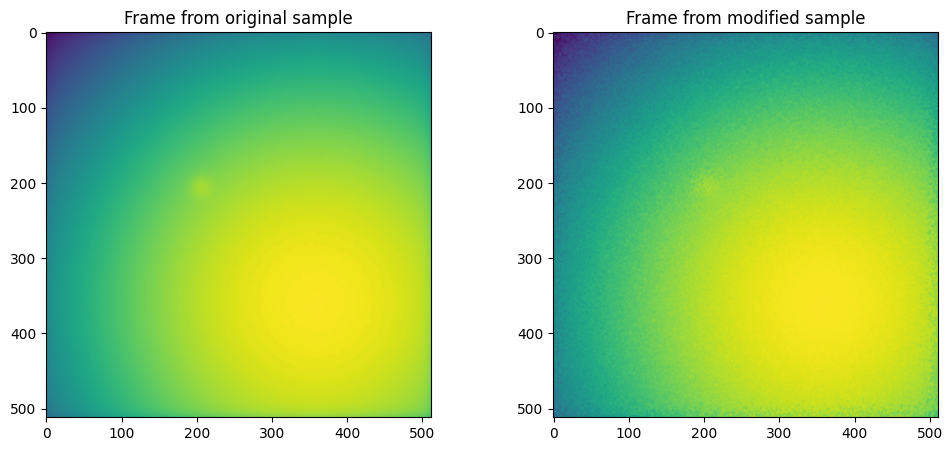

In [54]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.imshow(sample[0,50,:,:])
plt.title('Frame from original sample')

plt.subplot(1,2,2)
plt.imshow(sample_ela[0,50,:,:])
plt.title('Frame from modified sample')

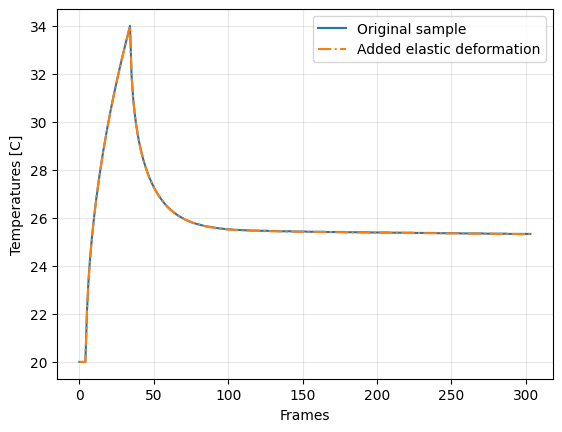

In [57]:
plt.plot(sample[0,:,250,250],label='Original sample')
plt.plot(sample_ela[0,:,250,250],label='Added elastic deformation',linestyle='-.')
plt.xlabel('Frames')
plt.ylabel('Temperatures [C]')
plt.grid(alpha=0.3)
plt.legend()
